In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Mydata= pd.read_excel("/content/drive/MyDrive/Для карьеры/для яндекса/shmya_final_version-_1_.xlsx")
#загрузим наши данные и посмотрим на них

In [ ]:
Mydata

,date,cutlery,tips,order_price,uid,order_id
0,2022-01-17 06:38:43,3,100,1001,120967,73041443
1,2022-01-23 11:09:22,4,110,309,325757,60500835
2,2022-01-24 19:40:03,1,10,891,986730,43230531
3,2022-01-14 18:01:22,5,70,749,868648,46180789
4,2022-01-19 22:32:43,2,10,469,863523,59266169
...,...,...,...,...,...,...
26052,2022-01-04 05:21:39,4,10,763,182587,85041983
26053,2022-01-18 14:43:12,3,60,790,187031,47894568
26054,2022-01-26 18:08:02,1,90,502,247419,75350869
26055,2022-01-18 05:55:09,2,80,418,474601,79438423


In [ ]:
Mydata.describe()
#посмотрим на значения нас интересуют средние, максимальные, минимальные и персентили
#выяснили: приборы 1-6, чаевые 0-46-170, сумма заказа 0-604-1939
# не нравится, что сумма заказа 0, можем заменить на пустоту, если бы мы обучали модель на этих данных,
# но не будем, так как предполагаем, что такие заказы были оплачены бонусами

,cutlery,tips,order_price,uid,order_id
count,26057.000000,26057.000000,26057.000000,26057.000000,2.605700e+04
mean,3.197759,61.170127,604.250528,550463.164831,5.502894e+07
std,1.447685,45.747142,312.649276,257023.916767,2.575420e+07
min,1.000000,0.000000,0.000000,100192.000000,1.000406e+07
25%,2.000000,20.000000,417.000000,326445.000000,3.285579e+07
50%,3.000000,50.000000,619.000000,550824.000000,5.499804e+07
75%,4.000000,90.000000,821.000000,777225.000000,7.700578e+07
max,6.000000,170.000000,1939.000000,999966.000000,9.997691e+07


In [ ]:
data=pd.DataFrame(Mydata)
data.shape
#положим данные в датафрейм для удобства

(26057, 6)

In [ ]:
data.sort_values(by='cutlery',ascending=False)
#пока сортируем, но не группируем по колличеству приборов

,date,cutlery,tips,order_price,uid,order_id
21178,2022-01-01 16:13:02,6,0,0,544055,51952637
22398,2022-01-01 18:11:37,6,0,0,860722,80337077
4322,2022-01-01 01:57:03,6,0,0,598524,73219827
4325,2022-01-01 07:14:25,6,0,0,998953,90463338
1747,2022-01-01 04:17:43,6,0,0,293141,65713785
...,...,...,...,...,...,...
7217,2022-01-21 02:34:50,1,40,548,770325,14272842
7219,2022-01-02 11:01:21,1,40,875,544055,51952637
7221,2022-01-01 20:20:26,1,50,416,823936,36519806
7233,2022-01-08 03:22:37,1,30,638,547251,26486215


In [ ]:
#Посмотрим и сопоставим средние значения чаевых (tips) и суммы заказа(order_price) с числами приборов в заказе (cutlery) 
data.groupby(by='cutlery')['tips'].agg([np.mean,np.std, np.min, np.max])
#смотрим статистику сгруппировав по клличеству приборов, самые большие чаевые 
#по среднему, у заказов с 5, a не с 6 приборами

,mean,std,amin,amax
cutlery,,,,
1,44.587021,24.828926,10,90
2,57.377285,34.246820,10,120
3,67.705331,43.836396,10,170
4,58.159341,46.725801,0,170
5,79.509006,53.870452,0,170
6,65.139771,74.327326,0,170


In [ ]:
data.groupby(by='cutlery')['order_price'].agg([np.mean,np.std, np.min, np.max])
#как ни странно самый большой средний чек у заказов с 3 приборами

,mean,std,amin,amax
cutlery,,,,
1,641.233038,198.240403,272,1044
2,641.400082,203.201396,255,1043
3,670.797190,248.742487,254,1939
4,576.032967,326.846395,0,1931
5,544.126089,412.713943,0,1929
6,407.958704,529.814887,0,1936


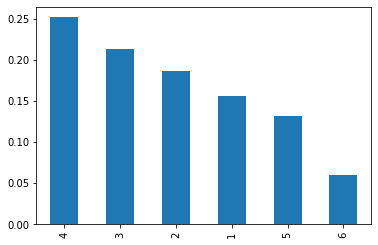

In [ ]:
#Возможно такие результаты из-за разницы в количестве значений в категориях, но нет 
#посмотрим на распределение колличества приборов через относительные частты
fig=plt.figure()
(data['cutlery'].value_counts()/len(data)).plot.bar()

In [ ]:
data.dropna().corr()
#Проверим корелляцию, для чаевых и количества приборов  
#График наглядно демонстрирует, заказы в которых строго больше 2 наборов приборов приносят больше чаевых, гипотеза подтверждена, при чём моя личная гипотеза2 (чем больше приборов в заказе, тем больше чаевых не подтвердилась)(если требуется более детальный разбор, можно построить модель линейной регрессии и попредсказывать)  


,cutlery,tips,order_price,uid,order_id
cutlery,1.000000,0.161478,-0.170217,0.005171,0.007509
tips,0.161478,1.000000,0.520580,-0.003633,0.004184
order_price,-0.170217,0.520580,1.000000,-0.004961,0.005608
uid,0.005171,-0.003633,-0.004961,1.000000,0.006298
order_id,0.007509,0.004184,0.005608,0.006298,1.000000


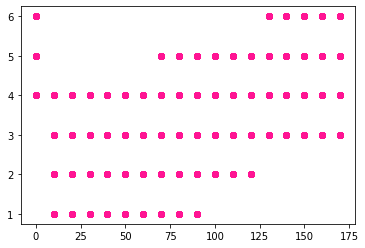

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data.tips, data.cutlery,c = 'deeppink')
#ax.scatter(data.tips, data.query("cutlery<=2"), c = 'darkblue')


Выберем сегмент пользователей для дальнейшей коммуникации. В сегмент должны попасть все uid пользователей, которые добавляли в заказ больше двух комплектов столовых приборов и делали заказ не в январские праздники на сумму больше 800p 

In [ ]:
import datetime
#Попробуем отобрать заказы с нужным нам диапазоном дат 

In [ ]:
data['date']=data['date'].astype('datetime64')
data.dtypes


date           datetime64[ns]
cutlery                 int64
tips                    int64
order_price             int64
uid                     int64
order_id                int64
dtype: object

In [ ]:
date_compare = datetime.datetime(year=2022, month=1, day=9)

a = data[data['date'] > date_compare]

In [ ]:
a

,date,cutlery,tips,order_price,uid,order_id
0,2022-01-17 06:38:43,3,100,1001,120967,73041443
1,2022-01-23 11:09:22,4,110,309,325757,60500835
2,2022-01-24 19:40:03,1,10,891,986730,43230531
3,2022-01-14 18:01:22,5,70,749,868648,46180789
4,2022-01-19 22:32:43,2,10,469,863523,59266169
...,...,...,...,...,...,...
26050,2022-01-21 02:29:30,2,60,620,346159,15186487
26053,2022-01-18 14:43:12,3,60,790,187031,47894568
26054,2022-01-26 18:08:02,1,90,502,247419,75350869
26055,2022-01-18 05:55:09,2,80,418,474601,79438423


In [ ]:
new_data=a.query("cutlery>2 and order_price>800")
new_data.sort_values(by='date')

,date,cutlery,tips,order_price,uid,order_id
20796,2022-01-09 00:09:06,4,50,832,604338,43336301
25992,2022-01-09 00:09:51,4,140,965,248568,30994884
1713,2022-01-09 00:11:43,4,160,1607,782840,90165380
2782,2022-01-09 00:16:59,3,30,830,951568,32747000
16331,2022-01-09 00:21:25,3,30,833,179026,30090720
...,...,...,...,...,...,...
15441,2022-01-31 23:50:32,5,140,923,765100,22515381
2845,2022-01-31 23:55:11,6,170,1048,715799,20348719
11409,2022-01-31 23:58:58,4,30,902,566123,67024304
22593,2022-01-31 23:59:08,5,110,1012,404643,35414513


In [ ]:
new_data.drop_duplicates(subset = 'uid', inplace = True)
len(new_data)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


2607

In [1]:
csv_data = new_data.to_excel('/content/drive/MyDrive/Для карьеры/для яндекса/new_data.xlsx')
#columns=['uid'],

NameError: ignored

Uid пользователей по ссылке: 

https://docs.google.com/spreadsheets/d/1-48neQa3TLeCFbrUIg2ADUkC5EDOmGIP/edit?usp=sharing&ouid=115089315853964988980&rtpof=true&sd=true 